# Controle continu 1 - compter les mots

#### Devoir à rendre le 6 janvier 2024 à minuit au plus tard au format notebook 
#### noter ici [UTC503 - Nom - Prenom Binome ou monome (pas de trinome)]

In [ ]:
[UTC503 - JOBERT LOUIS]

On se propose dans ce TP d'étudier la fréquence de mots et leur pertinence dans plusieurs documents. On cherchera par la suite (dans un autre TP) à évaluer la similarité entre documents. ce type d'opérations s'inscrit dans une displine plus générale :  le traitement naturel du langage (NLP). Les algorithmes exploitant la fréquence de mots font partie d'une famille appelée "bag of words" très utilisée par les acteurs de la data.

## Partie 1 
### Exercice preparatoire : lire un fichier.
La lecture de données peut s'effectuer à la volée sur Internet (csv, json, xml, etc.) ou en "parsant" les données depuis des pages web (crawling). On se contentera de lire les données dans des fichiers.

Lire la première fable de lafontaine : fichier `lafontaine01.txt` par une des méthode de lecture proposée.

Il existe plusieurs techniques pour lire un fichier texte:

- Lire ce fichier d'une seule traite (déconseillé pour de gros fichiers)
```
descripteur = open("fichier.txt", "r", encoding='utf8')
chaineTexte = descripteur.read()
```
- Charger ce fichier ligne à ligne (on récupère une liste de lignes)
```
descripteur = open("fichier.txt", "r", encoding='utf8')
listelignes = descripteur.readlines()
```

- Lecture ligne avec traitement ligne par ligne
```
with open("fichier.txt", 'r', encoding='utf8') as descripteur:
    lignes = descripteur.readlines()
    for ligne in lignes:
        print(ligne)
```

In [1]:
descripteur = open("lafontaine01.txt", "r", encoding='utf8')
listelignes = descripteur.readlines()
print(listelignes)

['La Cigale, ayant chanté \n', "             Tout l'été,\n", 'Se trouva fort dépourvue\n', 'Quand la bise fut venue.\n', 'Pas un seul petit morceau\n', 'De mouche ou de vermisseau (1).\n', 'Elle alla crier famine\n', 'Chez la Fourmi sa voisine,\n', 'La priant de lui prêter\n', 'Quelque grain pour subsister\n', "Jusqu'à la saison nouvelle.\n", 'Je vous paierai, lui dit-elle,\n', "Avant l'août (2), foi d'animal,\n", 'Intérêt et principal.\n', "La Fourmi n'est pas prêteuse ;\n", "C'est là son moindre défaut (3).\n", 'Que faisiez-vous au temps chaud ?\n', 'Dit-elle à cette emprunteuse (4).\n', 'Nuit et jour à tout venant\n', 'Je chantais, ne vous déplaise.\n', "Vous chantiez ? j'en suis fort aise :\n", 'Et bien ! dansez maintenant. ']


## Partie 2 
### 1. Preprocessing des données  - fonction cleaning_map(texte) 
Dans une première étape on cherchera à nettoyer les données par une fonction ``cleaning(texte)` qui prend en entrée un texte et renvoie la liste des mots de ce texte (map) ainsi nettoyés :
1. Suppprimer la ponctuation
2. Remplacer les tirets des mots liés par un espace (ex. celui-ci--> celui ci). Ainsi nous avons bien deux mots
3. Remplacer les mots contractés (taille 1 caractère) soit en les supprimant soit en les remplacant par leur équivalent non contractés  (exemple l --> le ou la au choix). on repère les mots contractés en cherchant les mots de une à deux lettres. ci-dessous le dictionnaire des mots contractés (`'d':'de', 's':'se', 'l':'le', 'j':'je', 'n':'ne', 'c':'ce'`)
4. Supprimer les stop-words (articles, pronom, etc.) seront supprimés. Une liste non exhaustive vous est fournie dans le fichier _*stopwords.txt*_



### Stop words 
Dans le cas on on ne cherche à compter que les mots pertinents, les mots de liaisons sont inutiles. On parle alors de stop-words.

4. Supprimer les stop-words (articles, pronom, etc.) seront supprimés. Une liste non exhaustive vous est fournie dans le fichier _*stopwords.txt*_
- Renvoyer cette liste de mots restante (ce que l'on appelle un map)

In [78]:
import string

my_dict = { 'd': 'de','s': 'se','l': 'le','j': 'je','n': 'ne','c': 'ce', } #dictionnaire

def cleaning_map(texte):
    texte = texte.replace('-', ' ') # 2)Remplacements des tirets par un espace
    texte = texte.replace("'", " ") # Remplacements des apostrophes par un espace pour la suite (mots contractés)
    ponctuation= str.maketrans('','',string.punctuation) # 1)Sans ponctuation
    pas_de_ponctuation = texte.translate(ponctuation)
    
    
    descripteur = open("stopwords_fr.txt", "r", encoding='utf8') #lecture fichier stopword
    stopwords = descripteur.read()

    mots = pas_de_ponctuation.split()
    mots_propres = [mot for mot in mots if mot.lower() not in stopwords]  #création d'une liste mots_propres sans ajouter les mots dans le fichier stopwords
    
    mots_finaux = []
    for mot in mots_propres: #utilisation du dictionnaire et ajout de mot dans la liste mots_finaux
        if len(mot) <= 2 and mot in my_dict:
            mots_finaux.append(my_dict[mot])
        else:
            mots_finaux.append(mot)
    texte_propre = ' '.join(mots_finaux)
    return texte_propre

descripteur = open("lafontaine01.txt", "r", encoding='utf8')
chaineTexte = descripteur.read()
NouveauTexte = cleaning_map(chaineTexte)
print(NouveauTexte)

Cigale ayant chanté Tout été trouva fort dépourvue Quand bise fut venue seul petit morceau mouche vermisseau alla crier famine Chez Fourmi voisine priant prêter Quelque grain pour subsister Jusqu saison nouvelle paierai dit Avant août foi animal Intérêt principal Fourmi est prêteuse est moindre défaut faisiez temps chaud Dit emprunteuse Nuit jour tout venant chantais déplaise chantiez en suis fort aise bien dansez maintenant


### 2. Réduction des données - fonction reduce (word_count)
La liste de mots produite contient plusieurs fois les mêmes mots. Dans cette partie nous allons produire un dictionnaire contenant chaque mot (clé) et son occurrence (valeur) :
- Ecrire cette fonction `reduce(wordList)` qui 'reduit' notre liste de mots comme indiqué. Elle renvoie un dictionnaire:
```
toto 2
tutu 1
tonton 4
etc...
```

Cette façon de procéder *_map_* puis *_réduce_* a été inventée par Google pour réduire le texte concernant chaque compte utilisteur pour ne conserver que l'information pertinente. 
- La fonction `map()` fait l'inventaire des mots utiles
- La fonction `reduce()` réduit selon une règle (ici on compte les mots)
- L'ensemble des mots produits se nomme le corpus



In [19]:
import string

my_dict = {'d': 'de','s': 'se','l': 'le','j': 'je','n': 'ne','c': 'ce', }  #dictionnaire

def cleaning_map(texte):
    texte = texte.replace('-', ' ') # Remplacement des tirets par un espace
    texte = texte.replace("'", " ") # Remplacement des apostrophes par un espace pour la suite (mots contractés)
    ponctuation= str.maketrans('','',string.punctuation) # Sans ponctuation
    pas_de_ponctuation = texte.translate(ponctuation)
    
    
    descripteur = open("stopwords_fr.txt", "r", encoding='utf8') #lecture fichier stopword
    stopwords = descripteur.read()
    
    mots = pas_de_ponctuation.split()
    mots_propres = [mot for mot in mots if mot.lower() not in stopwords] #création d'une liste mots_propres sans ajouter les mots dans le fichier stopwords
    
    mots_finaux = []
    for mot in mots_propres: #utilisation du dictionnaire et ajout de mot dans la liste mots_finaux
        if len(mot) <= 2 and mot in my_dict:
            mots_finaux.append(my_dict[mot])
        else:
            mots_finaux.append(mot)
    texte_propre = ' '.join(mots_finaux)
    return texte_propre

def reduce(Wordlist):  #Fonction reduce qui reduit la liste de mots et renvoi un dictionnaire
    word_count = {}
    for word in Wordlist:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1
    return word_count

descripteur = open("lafontaine01.txt", "r", encoding='utf8')
chaineTexte = descripteur.read()
NouveauTexte = cleaning_map(chaineTexte)
occurences=reduce(NouveauTexte.split())

for mot, count in occurences.items():
    print(f"{mot}:{count}")

Cigale:1
ayant:1
chanté:1
Tout:1
été:1
trouva:1
fort:2
dépourvue:1
Quand:1
bise:1
fut:1
venue:1
seul:1
petit:1
morceau:1
mouche:1
vermisseau:1
alla:1
crier:1
famine:1
Chez:1
Fourmi:2
voisine:1
priant:1
prêter:1
Quelque:1
grain:1
pour:1
subsister:1
Jusqu:1
saison:1
nouvelle:1
paierai:1
dit:1
Avant:1
août:1
foi:1
animal:1
Intérêt:1
principal:1
est:2
prêteuse:1
moindre:1
défaut:1
faisiez:1
temps:1
chaud:1
Dit:1
emprunteuse:1
Nuit:1
jour:1
tout:1
venant:1
chantais:1
déplaise:1
chantiez:1
en:1
suis:1
aise:1
bien:1
dansez:1
maintenant:1


### 3. Affichage la distribution des mots 
Construire un graphique qui met en évidence la distribution des mots (en ordonnée la fréquence du mot et en abscisse les mots du corpus. 

On utilisera la librairie graphique Seaborn 
- https://seaborn.pydata.org/generated/seaborn.barplot.html

```
# import de la bibliothèque
import seaborn as sns 

#modifier la taille de la figure pour l'adapter
sns.set(rc={'figure.figsize':(20,10)})

# afficher un histogramme. les données doivent être dans une liste
# transformez donc vos clés et valeurs du dictionnaire en liste
# idéalement ordonnez vos clés
sns.barplot(data=None,  x=liste_des_x, y=liste_des_y)
```

quelles conclusions tirez-vous? 
- au sujet du volume de donnée? 
- de ce qu'il conviendrait de faire?

Cigale:1
ayant:1
chanté:1
Tout:1
été:1
trouva:1
fort:2
dépourvue:1
Quand:1
bise:1
fut:1
venue:1
seul:1
petit:1
morceau:1
mouche:1
vermisseau:1
alla:1
crier:1
famine:1
Chez:1
Fourmi:2
voisine:1
priant:1
prêter:1
Quelque:1
grain:1
pour:1
subsister:1
Jusqu:1
saison:1
nouvelle:1
paierai:1
dit:1
Avant:1
août:1
foi:1
animal:1
Intérêt:1
principal:1
est:2
prêteuse:1
moindre:1
défaut:1
faisiez:1
temps:1
chaud:1
Dit:1
emprunteuse:1
Nuit:1
jour:1
tout:1
venant:1
chantais:1
déplaise:1
chantiez:1
en:1
suis:1
aise:1
bien:1
dansez:1
maintenant:1


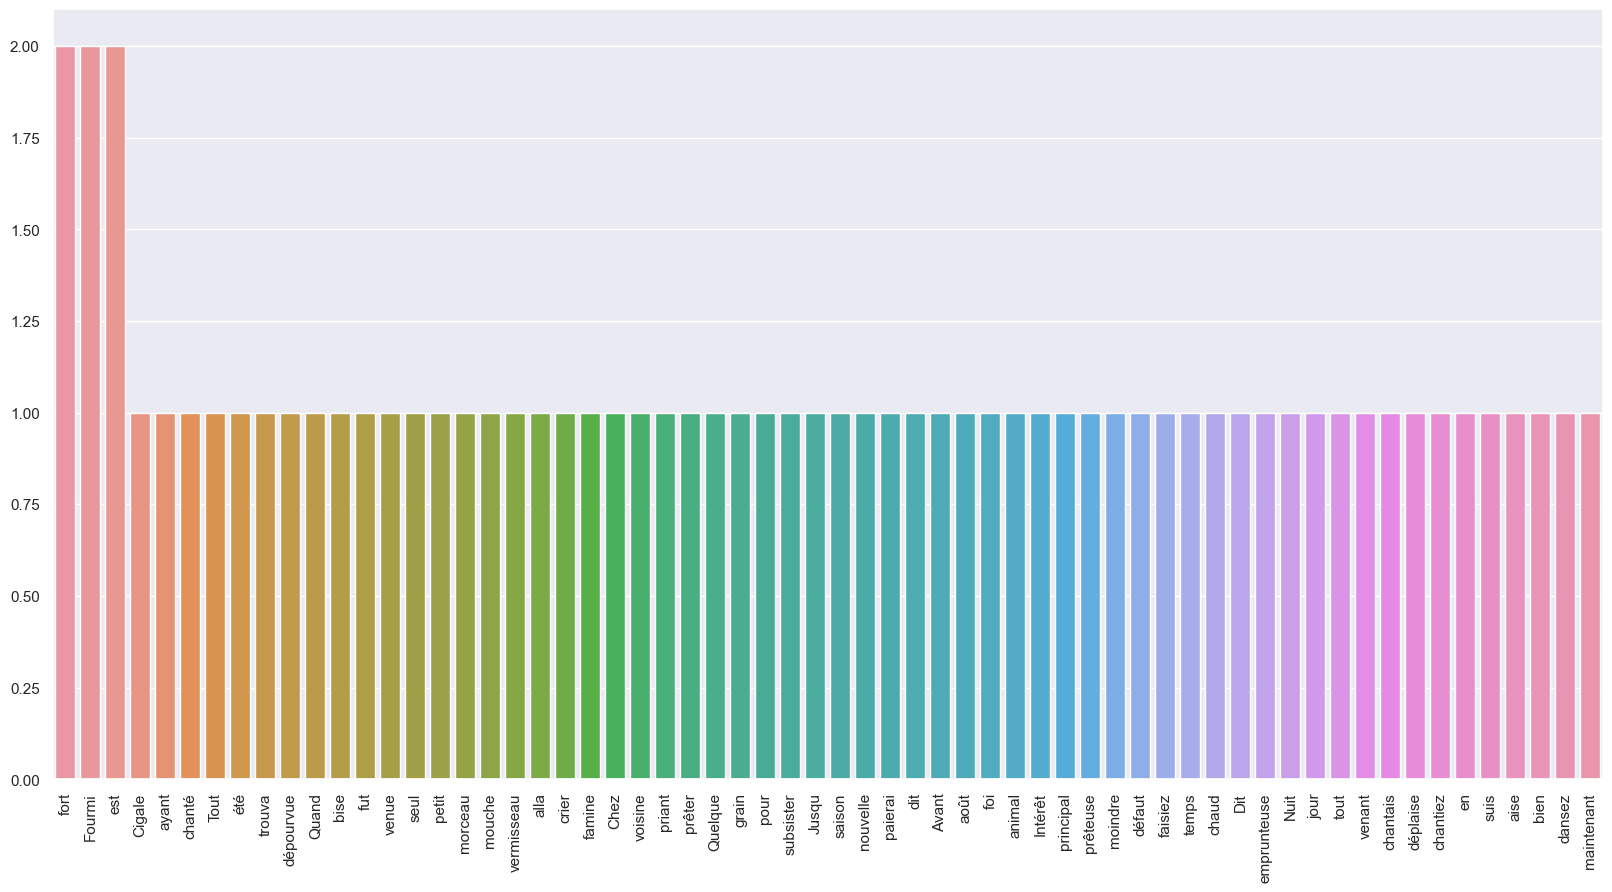

In [27]:
import string

my_dict = {'d': 'de','s': 'se','l': 'le','j': 'je','n': 'ne','c': 'ce', }  #dictionnaire

def cleaning_map(texte):
    texte = texte.replace('-', ' ') # Remplacement des tirets par un espace
    texte = texte.replace("'", " ") # Remplacement des apostrophes par un espace pour la suite (mots contractés)
    ponctuation= str.maketrans('','',string.punctuation) # Sans ponctuation
    pas_de_ponctuation = texte.translate(ponctuation)
    
    
    descripteur = open("stopwords_fr.txt", "r", encoding='utf8') #lecture fichier stopword
    stopwords = descripteur.read()
    
    mots = pas_de_ponctuation.split()
    mots_propres = [mot for mot in mots if mot.lower() not in stopwords] #création d'une liste mots_propres sans ajouter les mots dans le fichier stopwords
    
    mots_finaux = []
    for mot in mots_propres: #utilisation du dictionnaire et ajout de mot dans la liste mots_finaux
        if len(mot) <= 2 and mot in my_dict:
            mots_finaux.append(my_dict[mot])
        else:
            mots_finaux.append(mot)
    texte_propre = ' '.join(mots_finaux)
    return texte_propre

def reduce(Wordlist):  #Fonction reduce qui reduit la liste de mots et renvoi un dictionnaire
    word_count = {}
    for word in Wordlist:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1
    return word_count

descripteur = open("lafontaine01.txt", "r", encoding='utf8')
chaineTexte = descripteur.read()
NouveauTexte = cleaning_map(chaineTexte)
occurences=reduce(NouveauTexte.split())

for mot, count in occurences.items():
    print(f"{mot}:{count}")

    
#lecture graphique
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20,10)})
mots_tries = sorted(occurences.items(), key=lambda item: item[1], reverse=True)
liste_des_x = [mot[0] for mot in mots_tries]
liste_des_y = [mot[1] for mot in mots_tries]
sns.barplot(x=liste_des_x, y=liste_des_y)

plt.xticks(rotation=90)

plt.show()

## Partie 3 - généralisation avec le livre 1 de Lafontaine
- Lire les fables de lafontaine : fichier `la_fontaine_fables_all.txt` fourni et refaire les questions 1,2,3 
- quels sont les 10 mots les plus fréquents?


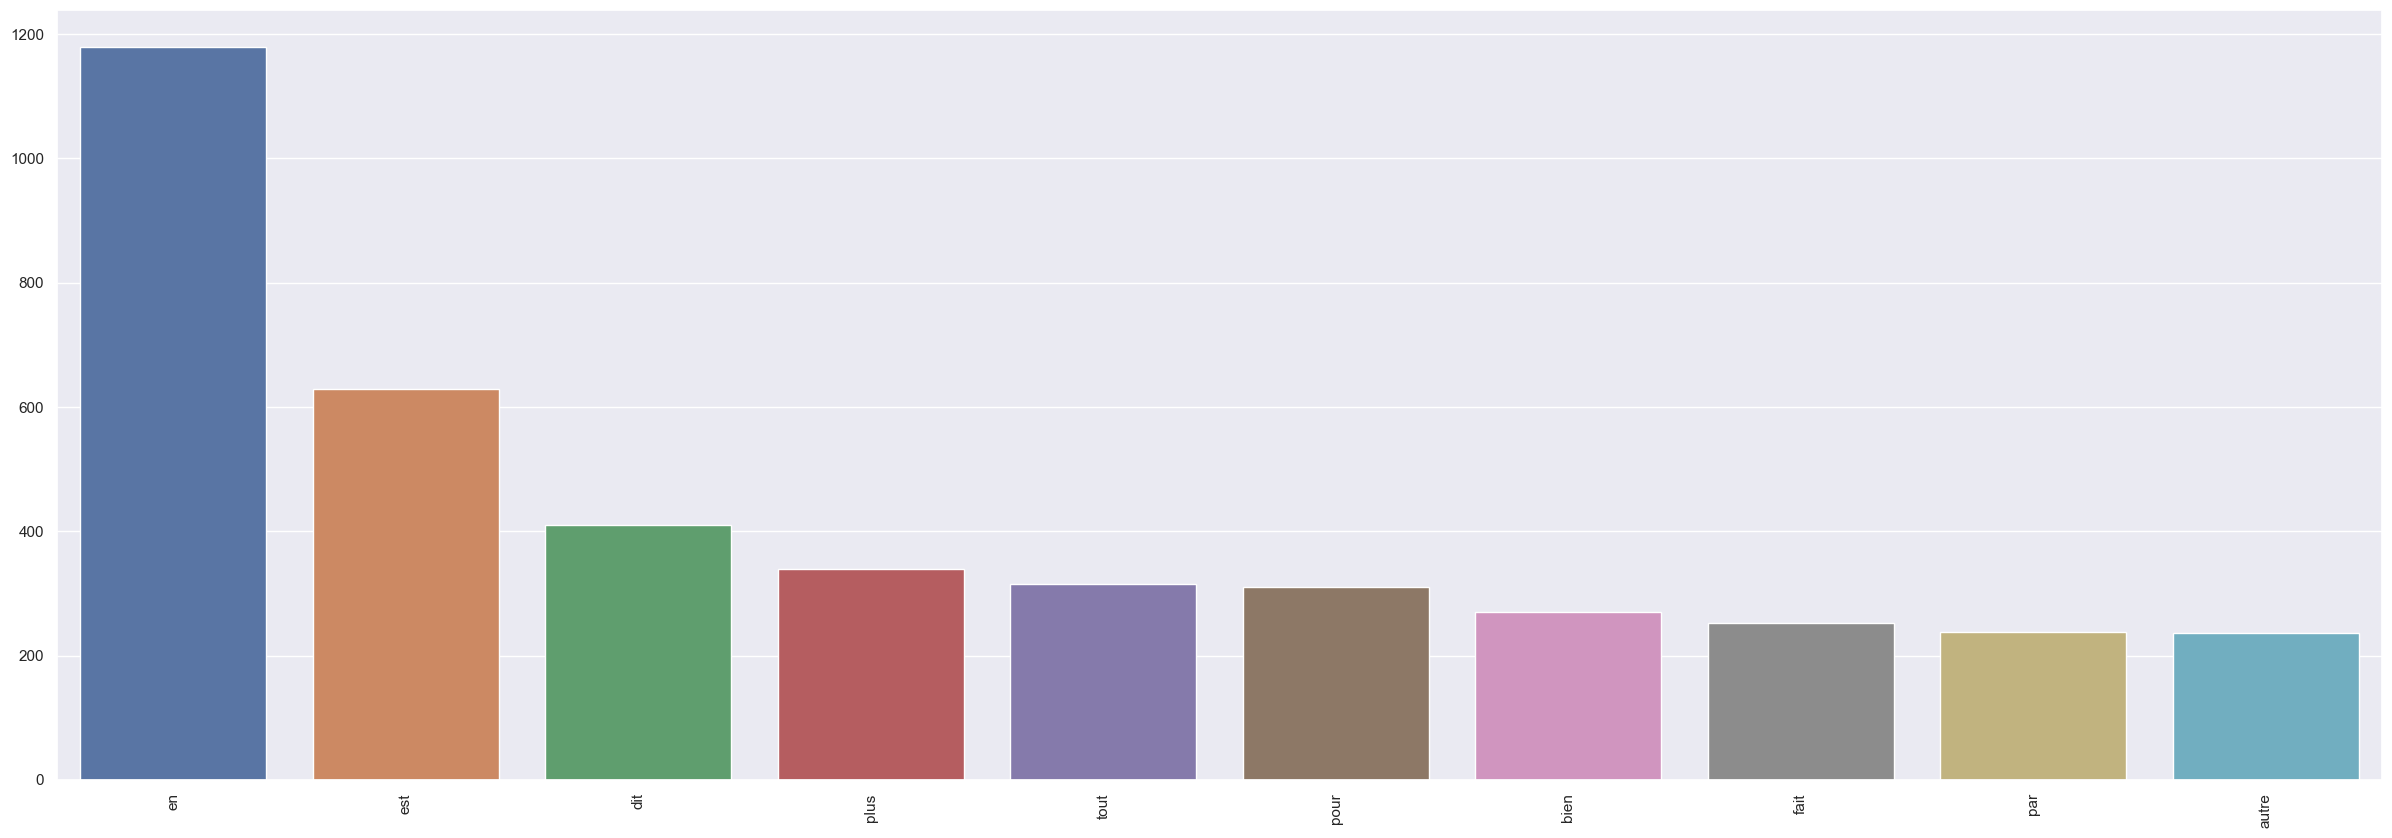

Les 10 mots les plus fréquents sont : ['en', 'est', 'dit', 'plus', 'tout', 'pour', 'bien', 'fait', 'par', 'autre']


In [28]:
import string

my_dict = {'d': 'de','s': 'se','l': 'le','j': 'je','n': 'ne','c': 'ce',} #dictionnaire

def cleaning_map(texte):
    
    suppr_caracteres="– - ’ « » "+string.punctuation #Suppression de caracteres
    ponctuation= str.maketrans(suppr_caracteres,' ' *len(suppr_caracteres)) # Sans ponctuation
    
    pas_de_ponctuation = texte.translate(ponctuation)
    
    
    descripteur = open("stopwords_fr.txt", "r", encoding='utf8')#lecture du fichier stopwords
    stopwords = descripteur.read()
    
    mots = pas_de_ponctuation.split()
    mots_propres = [mot for mot in mots if mot.lower() not in stopwords] #création d'une liste mots_propres sans ajouter les mots dans le fichier stopwords
    
    mots_finaux = []
    for mot in mots_propres:#utilisation du dictionnaire et ajout de mot dans la liste mots_finaux
        if len(mot) <= 2 and mot in my_dict:
            mots_finaux.append(my_dict[mot])
        else:
            mots_finaux.append(mot)
    texte_propre = ' '.join(mots_finaux)
    return texte_propre

def reduce(Wordlist):#Fonction reduce qui reduit la liste de mots et renvoi un dictionnaire
    word_count = {}
    for word in Wordlist:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1
    return word_count
descripteur = open("la_fontaine_fables_all.txt", "r", encoding='utf8')
chaineTexte = descripteur.read()
NouveauTexte = cleaning_map(chaineTexte)
occurences=reduce(NouveauTexte.split())
for mot, count in occurences.items():
    #print(f"{mot}:{count}")

    import seaborn as sns
import matplotlib.pyplot as plt
# Modifie la taille de la figure pour l'adapter
sns.set(rc={'figure.figsize':(30,10)})
# Tri des mots par fréquence (occurrences)
mots_tries = sorted(occurences.items(), key=lambda item: item[1], reverse=True)
#Sélection des 10 mots les plus utilisés
mots_top10 = mots_tries[:10]

# Séparation des mots et de leurs occurrences en deux listes
liste_des_x = [mot[0] for mot in mots_top10]  # Mots (clés)
liste_des_y = [mot[1] for mot in mots_top10]  # Fréquence (occurrences)

sns.barplot(x=liste_des_x, y=liste_des_y)# Création du graphique avec seaborn

plt.xticks(rotation=90)# Réglages pour mieux afficher les étiquettes (rotation à 90 degrés)

plt.show()# Affichage du graphique avec Matplotlib
print('Les 10 mots les plus fréquents sont :', [mot[0] for mot in mots_top10])